## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [9]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:

def build_mlp(
    input_shape,
    mode=True,
    acti="relu",
    l1Rate=0.05,
    l2Rate=0.05,
    dropRate=.25,
    class_num=10, 
    unitArray=[512, 256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)

    for idx, unit in enumerate(unitArray): 
        if idx == 0:
            x = keras.layers.Dense(units=unit, kernel_regularizer=keras.regularizers.l1_l2(l1Rate, l2Rate))(input_layer)
            if mode:
                x = keras.layers.Activation(acti)(x)
                x = keras.layers.BatchNormalization()(x)
            else:
                x = keras.layers.BatchNormalization()(x)
                x = keras.layers.Activation(acti)(x)
        else:
            x = keras.layers.Dense(units=unit, kernel_regularizer=keras.regularizers.l1_l2(l1Rate, l2Rate))(x)
            if mode:
                x = keras.layers.Activation(acti)(x)
                x = keras.layers.BatchNormalization()(x)
            else:
                x = keras.layers.BatchNormalization()(x)
                x = keras.layers.Activation(acti)(x)
    
    x = keras.layers.Dropout(dropRate)(x)
    result = keras.layers.Dense(units=class_num, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[result])

    return model

In [14]:
"""Code Here
設定超參數
"""

"""Code Here
設定超參數
"""
LR = 0.001
BATCH_SIZE = [128, 256]
EPOCH = 50

adam = keras.optimizers.Adam(lr=LR)

In [15]:
results = {}
permutationArray = []
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for (batch, mode) in itertools.product(BATCH_SIZE, [True, False]):

    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:], mode=mode)
    model.compile(
        optimizer=adam,
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    model.fit(
        x_train,
        y_train,
        batch_size=batch,
        epochs=EPOCH,
        validation_data=(x_test, y_test)
    )

    name = f"{batch}_{mode}"
    permutationArray.append(name)
    results[name] = {
            "acc":model.history.history["accuracy"],
            "val_acc":model.history.history["val_accuracy"],
            "loss":model.history.history["loss"],
            "val_loss":model.history.history["val_loss"]
        }


tep - loss: 11.5918 - accuracy: 0.1852 - val_loss: 11.6437 - val_accuracy: 0.1362
Epoch 19/50
50000/50000 [==============================] - 8s 159us/step - loss: 11.5598 - accuracy: 0.1849 - val_loss: 11.5768 - val_accuracy: 0.1642
Epoch 20/50
50000/50000 [==============================] - 8s 159us/step - loss: 11.5366 - accuracy: 0.1851 - val_loss: 11.6166 - val_accuracy: 0.1514
Epoch 21/50
50000/50000 [==============================] - 8s 159us/step - loss: 11.5545 - accuracy: 0.1866 - val_loss: 11.8838 - val_accuracy: 0.0993
Epoch 22/50
50000/50000 [==============================] - 8s 160us/step - loss: 11.5289 - accuracy: 0.1858 - val_loss: 12.0332 - val_accuracy: 0.1249
Epoch 23/50
50000/50000 [==============================] - 8s 160us/step - loss: 11.5133 - accuracy: 0.1831 - val_loss: 12.0032 - val_accuracy: 0.1283
Epoch 24/50
50000/50000 [==============================] - 8s 159us/step - loss: 11.5274 - accuracy: 0.1847 - val_loss: 11.7673 - val_accuracy: 0.1070
Epoch 25/50


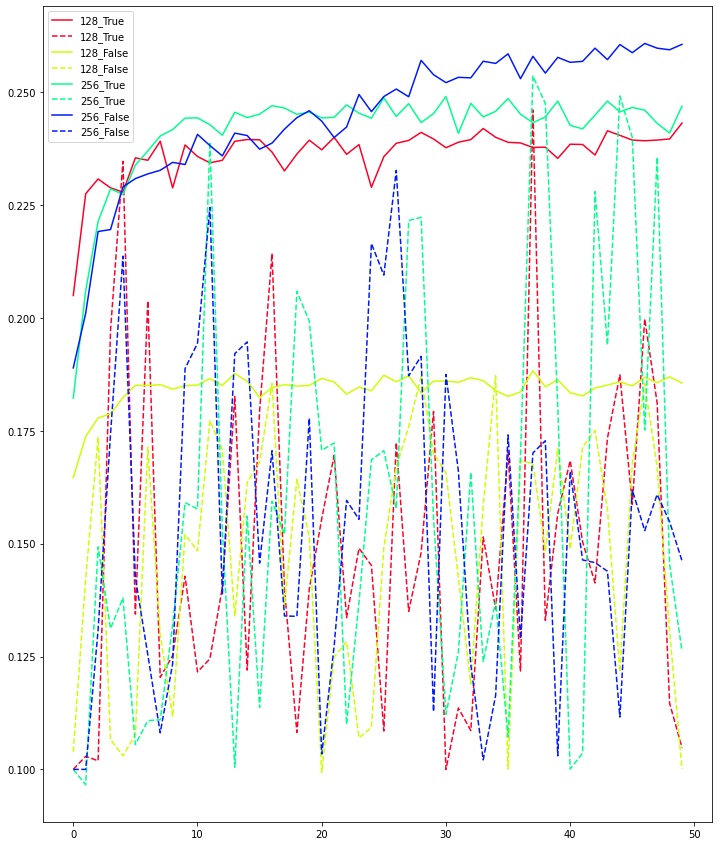

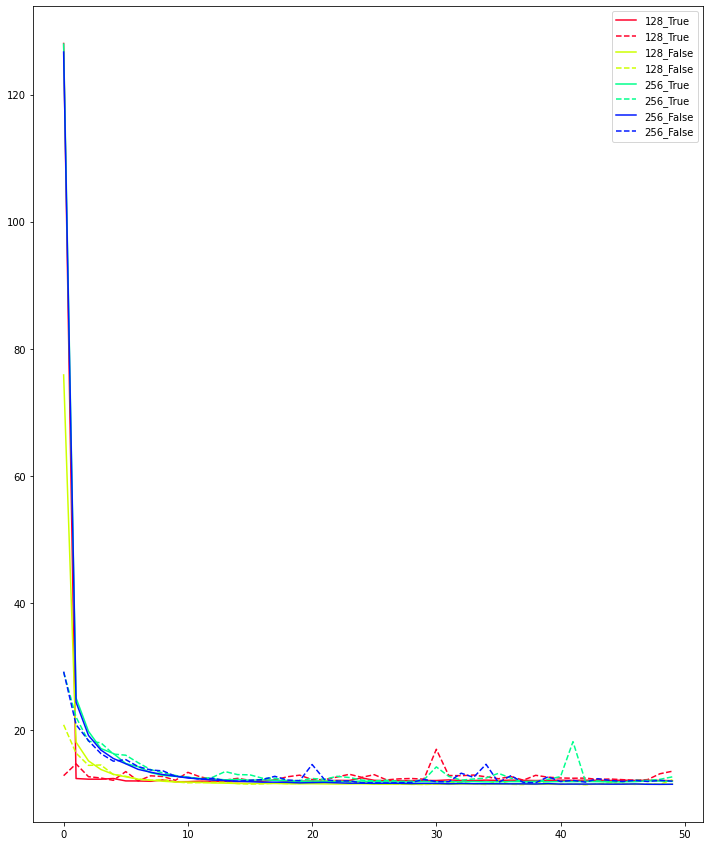

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

cm = plt.get_cmap("gist_rainbow")
colorArray = [ cm(1.0 * i/len(permutationArray)) for i in range(len(permutationArray))]

plt.figure(figsize=(12,15))
for idx, name in enumerate(permutationArray):
    plt.plot(range(EPOCH), results[name]["acc"], "-", label=name, c=colorArray[idx])
    plt.plot(range(EPOCH), results[name]["val_acc"], "--", label=name, c=colorArray[idx])

plt.legend()
plt.show()

plt.figure(figsize=(12,15))
for idx, name in enumerate(permutationArray):
    plt.plot(range(EPOCH), results[name]["loss"], "-", label=name, c=colorArray[idx])
    plt.plot(range(EPOCH), results[name]["val_loss"], "--", label=name, c=colorArray[idx])

plt.legend()
plt.show()